In [1]:
# Import the packages
import tensorflow as tf
import pandas as pd
import numpy as np
import math

ModuleNotFoundError: No module named 'pandas'

In [141]:
# Check the tensorflow version
print('Tensorflow version: ' + tf.__version__)
tf.set_random_seed(0)

Tensorflow version: 1.13.0-rc2


In [142]:
# To plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [143]:
# To normalizie the data
from sklearn.preprocessing import MinMaxScaler, RobustScaler, Normalizer, StandardScaler
#scaler = MinMaxScaler(feature_range=(0, 1)) # shrinks the range such that the range is now between 0 and 1
#scaler = RobustScaler() 
#scaler = Normalizer()
scaler = StandardScaler()

In [144]:
# Load the numpy array input data
data_media_stream = np.load('MediaStreamBatch.npy')
data_web_search = np.load('whole_ss_filenameY.npy')
data_web_server = np.load('whole_webserv_filenameY.npy')
data_mix_1 = np.load('whole_april7_try1_filenameY.npy')
data_mix_2 = np.load('whole_april7_try2_filenameY.npy')

In [145]:
# The dimensions
n = data_media_stream.shape[0] + data_web_search.shape[0] + data_web_server.shape[0] + data_mix_1.shape[0] + data_mix_2.shape[0]

In [146]:
# Combine all data together
data = np.concatenate((data_media_stream, data_web_search, data_web_server, data_mix_1, data_mix_2), axis=0)

In [147]:
# Convert the np_array to .csv file
pd.DataFrame(data).to_csv('whole_data.csv')

In [148]:
# Read the file
#df = pd.read_csv('whole_data.csv')

# This is the one that removes the insignificant features
df = pd.read_csv('whole_data_extract.csv') 
data = df.values

In [149]:
df.head()

,Unnamed: 0,0,1,2,3,4,6,7,8,9,17,19,20,21,22,23,24
0,0,1274.861219,38,0.04,0.05,36.90,0.2,2481,1806,1510,0,0,522,66,432,9.94565,74.3
1,1,1203.634562,38,0.03,0.05,36.71,0.2,2467,1765,1416,0,0,615,175,432,13.32190,86.4
2,2,1201.212156,38,0.04,0.05,36.78,0.2,2471,1772,1431,0,2048,1177,693,432,13.11670,85.9
3,3,1201.047281,38,0.03,0.06,36.71,0.2,2515,1854,1471,0,0,660,224,432,10.81540,85.4
4,4,1201.296063,38,0.03,0.05,36.71,0.2,2494,1795,1379,0,98304,459,535,432,11.35030,76.6


In [150]:
# The dimensions
n = data.shape[0] # 16010 rows
p = data.shape[1] # 25 cols

print(n) 
print(p)

16010
17


In [151]:
# Range of the power consumption
# print(df[[df.columns[25]]].max())
# print(df[[df.columns[25]]].min())

In [152]:
# Plot
# plt.figure(figsize=(16, 8))
# plt.title('bytes_write v.s. Power Consumption')
# plt.ylabel('Power Consumption (Watt)')
# plt.xlabel('bytes_write')
# plt.grid(True)

# plt.plot(df[df.columns[20]], df[df.columns[25]])

In [153]:
#Split the training and test data:
train_start = 1 
train_end = int(np.floor(0.8 * n)) # 80% training data; 20% test data 
test_start = train_end 
test_end = n
data_train = data[np.arange(train_start, train_end), :] 
data_test = data[np.arange(test_start, test_end), :]

In [154]:
# Scale data
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

In [155]:
# Build X and y

# traing dataset
# X_train = data_train[:, 0: 24] # 0 to 22nd: 23 in total
# y_train = data_train[:, 24] # 23rd to 24th, 1 in total

# # testing dataset
# X_test = data_test[:, 0: 24]
# y_test = data_test[:, 24]

In [156]:
# Build X and y

# traing dataset
X_train = data_train[:, 1: 16] # 0 to 22nd: 23 in total
y_train = data_train[:, 16] # 23rd to 24th, 1 in total

# testing dataset
X_test = data_test[:, 1: 16]
y_test = data_test[:, 16]

In [157]:
# Number of features
n_features = 15 
#n_features = 24 # from 0th - 23th, 24 in total

In [158]:
# Numebr of neurons
n_neurons_1 = 128
n_neurons_2 = 64
n_neurons_3 = 32
n_neurons_4 = 16
# n_neurons_5 = 8
# n_neurons_6 = 4

In [159]:
# Placeholder: placeholders are used to feed values from python to TensorFlow ops
# X are the inputs, which are the features here, Y for output
X = tf.placeholder(dtype=tf.float32, shape=[None, n_features])
Y = tf.placeholder(dtype=tf.float32, shape=[None])
global_step = tf.Variable(0, trainable=False)

In [160]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [161]:
# Variables for hidden weights and biases

# Layer 1
W_hidden_1 = tf.Variable(weight_initializer([n_features, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))

# Layer 2
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))

# Layer 3
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))

# Layer 4
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Layer 5
# W_hidden_5 = tf.Variable(weight_initializer([n_neurons_4, n_neurons_5]))
# bias_hidden_5 = tf.Variable(bias_initializer([n_neurons_5]))

# Layer 6
# W_hidden_6 = tf.Variable(weight_initializer([n_neurons_5, n_neurons_6]))
# bias_hidden_6 = tf.Variable(bias_initializer([n_neurons_6]))

In [162]:
# Output layer
W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))

In [163]:
# Hidden layer: 5 layers in total
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))
# hidden_5 = tf.nn.relu(tf.add(tf.matmul(hidden_4, W_hidden_5), bias_hidden_5))
# hidden_6 = tf.nn.relu(tf.add(tf.matmul(hidden_5, W_hidden_6), bias_hidden_6))

In [164]:
# Output layer (must be transposed)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

In [165]:
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [166]:
# Learning rate: apply the training decay
# the learning rate is: # 0.0001 + 0.003 * (1/e)^(global_step/50)), i.e. exponential decay from 0.003 -> 0.0001
learning_rate = 0.0001 + tf.train.exponential_decay(0.003, global_step, 50, 0.96, 1/math.e)

In [167]:
# Optimizer; Adam stands for Adaptive Moment Estimation
#optimizer = tf.train.AdamOptimizer(learning_rate).minimize(mse)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(mse)
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(mse)

In [168]:
# Perform the initialization which is only the initialization of all global variables
init = tf.global_variables_initializer()

In [169]:
# ------ Set Session or InteractiveSession
sess = tf.Session()
sess.run(init)

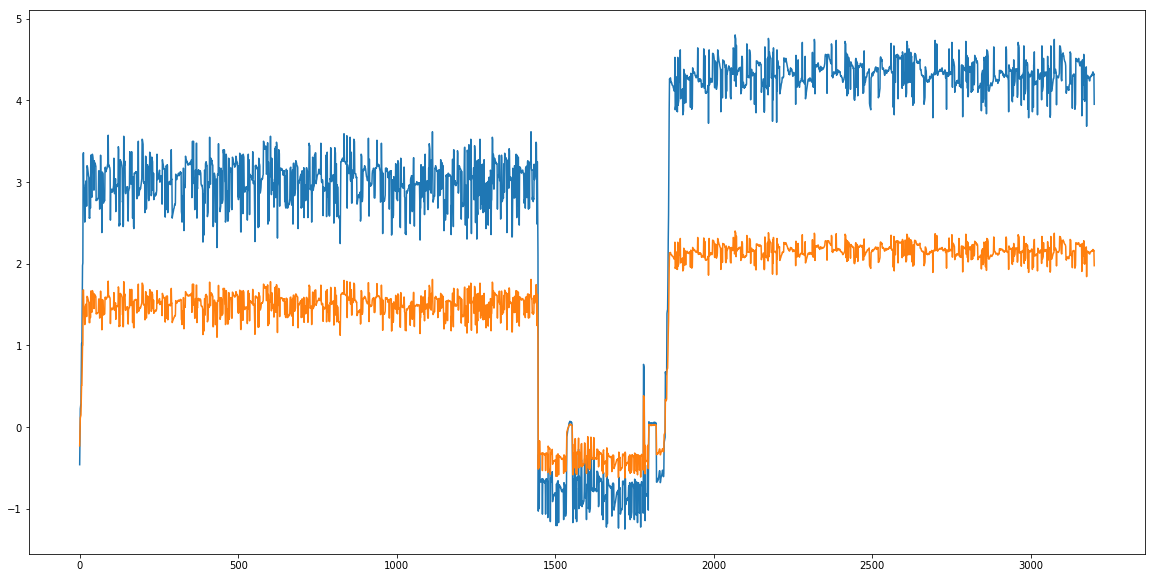

In [170]:
# Setup interactive plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test * 0.5)
plt.show()

In [171]:
# Fit neural net
batch_size = 128 # Total number of training examples present in a single batch.
mse_train = []
mse_test = []

In [172]:
# Run
epochs = 60 # One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.

for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        
        # Run optimizer with batch
        sess.run(optimizer, feed_dict={X: batch_x, Y: batch_y})

        # Show progress
        if np.mod(i, 100) == 0: # every 100 steps
            # MSE train and test
            mse_train.append(sess.run(mse, feed_dict={X: X_train, Y: y_train}))
            mse_test.append(sess.run(mse, feed_dict={X: X_test, Y: y_test}))
            print('Epoch ' + str(e + 1))
            print('MSE Train: ', mse_train[-1])
            print('MSE Test: ', mse_test[-1])
            print('\n')
            
            # Prediction
            prediction = sess.run(out, feed_dict={X: X_test})
            line2.set_ydata(prediction)
            #plt.title('Epoch ' + str(e + 1) + ', Batch ' + str(i))
            #plt.pause(0.01)

Epoch 1
MSE Train:  1.0500991
MSE Test:  13.837317


Epoch 2
MSE Train:  0.302094
MSE Test:  6.5089293


Epoch 3
MSE Train:  0.19005144
MSE Test:  0.41860342


Epoch 4
MSE Train:  0.10371441
MSE Test:  0.9387994


Epoch 5
MSE Train:  0.08815479
MSE Test:  0.7852844


Epoch 6
MSE Train:  0.0756561
MSE Test:  0.5874296


Epoch 7
MSE Train:  0.097965054
MSE Test:  0.4465858


Epoch 8
MSE Train:  0.08567649
MSE Test:  0.64824116


Epoch 9
MSE Train:  0.10601843
MSE Test:  1.4937938


Epoch 10
MSE Train:  0.07906282
MSE Test:  0.99353045


Epoch 11
MSE Train:  0.10377188
MSE Test:  1.0095258


Epoch 12
MSE Train:  0.11917372
MSE Test:  0.8063955


Epoch 13
MSE Train:  0.10758195
MSE Test:  0.89266276


Epoch 14
MSE Train:  0.0620742
MSE Test:  1.1013999


Epoch 15
MSE Train:  0.07080166
MSE Test:  0.4359542


Epoch 16
MSE Train:  0.06417057
MSE Test:  1.1181906


Epoch 17
MSE Train:  0.058199078
MSE Test:  0.9262954


Epoch 18
MSE Train:  0.09805412
MSE Test:  0.7271406


Epoch 19
MSE Train

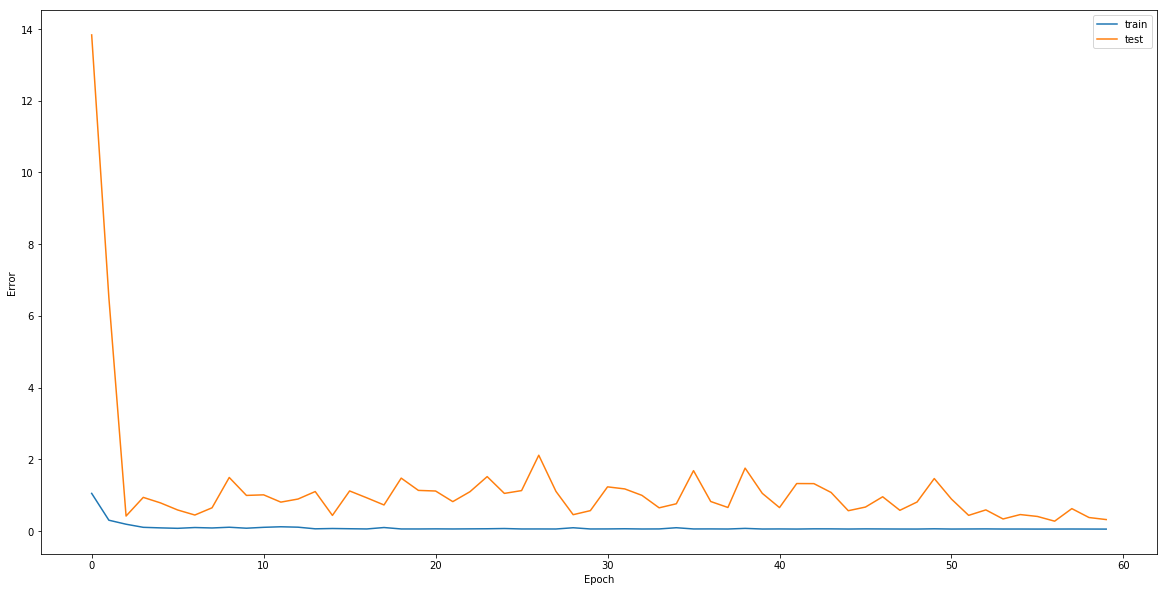

In [173]:
# plot
fig, ax = plt.subplots()
ax.plot(mse_train, label='train')
ax.plot(mse_test, label='test')
leg = ax.legend()
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.savefig("Error.png")
plt.show()

In [174]:
sess.close()